## Loading,Inspecting Google Analytics Timeseries data


In [0]:
from time import sleep
import csv

import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
#source: https://www.analyticsvidya.com/blog/2018/09/non-stationary-time-series-python/

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [0]:
from google.colab import drive
import pandas as pd
import io
drive.mount('/content/gdrive')
from datetime import datetime


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#if we try to lazy in google analytics csv exports,we run into trouble
googleanalyticsdata = pd.read_csv('/content/gdrive/My Drive/death1.csv')


In [0]:
#lets back up a step and print out the google analytics file,see if we can 
#locate the error.I am also goining to need to know how long the data is, as well

count = 0 
csvreader = csv.reader(open('/content/gdrive/My Drive/death1.csv'))
for aline in csvreader:
  count += 1
  print(aline)
  print('%s lines of data' %count)

['# ----------------------------------------', '']
1 lines of data
['# All Web Site Data', '']
2 lines of data
['# Audience Overview', '']
3 lines of data
['# 20190815-20200328', '']
4 lines of data
['# ----------------------------------------', '']
5 lines of data
['', '']
6 lines of data
['Day Index', 'Num0fCase']
7 lines of data
['2020/1/22', '0']
8 lines of data
['2020/1/23', '0']
9 lines of data
['2020/1/24', '0']
10 lines of data
['2020/1/25', '0']
11 lines of data
['2020/1/26', '0']
12 lines of data
['2020/1/27', '0']
13 lines of data
['2020/1/28', '0']
14 lines of data
['2020/1/29', '0']
15 lines of data
['2020/1/30', '0']
16 lines of data
['2020/1/31', '0']
17 lines of data
['2020/2/1', '0']
18 lines of data
['2020/2/2', '0']
19 lines of data
['2020/2/3', '0']
20 lines of data
['2020/2/4', '0']
21 lines of data
['2020/2/5', '0']
22 lines of data
['2020/2/6', '0']
23 lines of data
['2020/2/7', '0']
24 lines of data
['2020/2/8', '0']
25 lines of data
['2020/2/9', '0']
26 lines o

In [0]:
# we look through the docs for read_csv and find the "skip row" parameter

googleanalyticsdata = pd.read_csv('/content/gdrive/My Drive/death1.csv',skiprows = [0,1,2,3,4,5])


In [0]:
googleanalyticsdata.tail()

,Day Index,Num0fCase
75,2020/4/6,10780
76,2020/4/7,12718
77,2020/4/8,14691
78,2020/4/9,16474
79,2020/4/10,18578


In [0]:
# the data time for 'Day Index' is not a date time object!

googleanalyticsdata['Day Index'].describe()

count            80
unique           80
top       2020/1/26
freq              1
Name: Day Index, dtype: object

In [0]:
googleanalyticsdata.tail()

,Day Index,Num0fCase
75,2020/4/6,10780
76,2020/4/7,12718
77,2020/4/8,14691
78,2020/4/9,16474
79,2020/4/10,18578


In [0]:
#let's get a sense of what the variation in the data is.
#standard deviation is 83. Varies from 0 to 548.
print(googleanalyticsdata['Num0fCase'].describe())

count       80.000000
mean      1632.100000
std       3988.160169
min          0.000000
25%          0.000000
50%          3.500000
75%        344.250000
max      18578.000000
Name: Num0fCase, dtype: float64


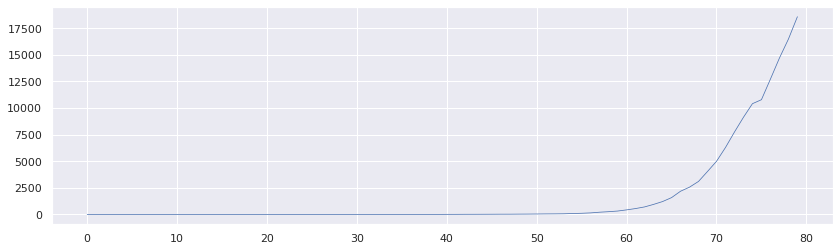

In [0]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14,4)})
googleanalyticsdata['Num0fCase'].plot(linewidth=0.75)

## Learning more about the time series(ADF/ACF/PACF)


In [0]:
adf_test(googleanalyticsdata['Num0fCase'])

Results of Dickey-Fuller Test:
Test Statistic                  1.861522
p-value                         0.998464
#Lags Used                     11.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


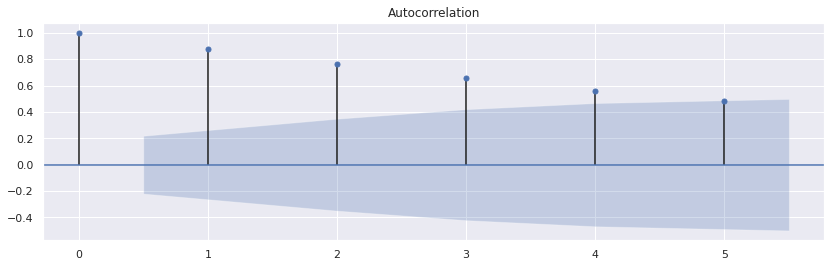

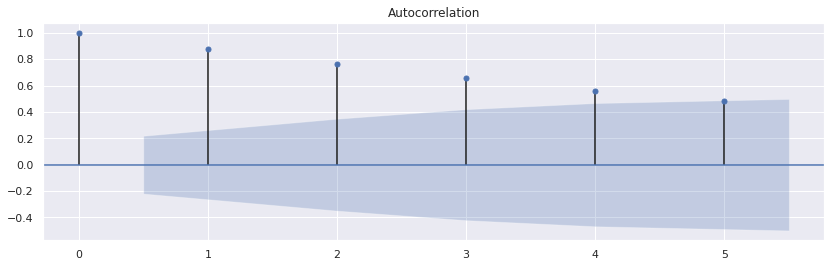

In [0]:
plot_acf(googleanalyticsdata['Num0fCase'],lags=5)

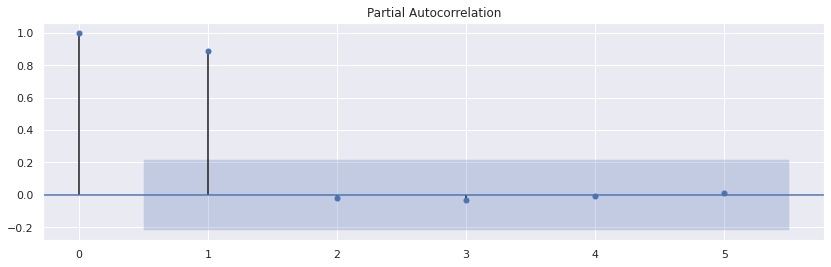

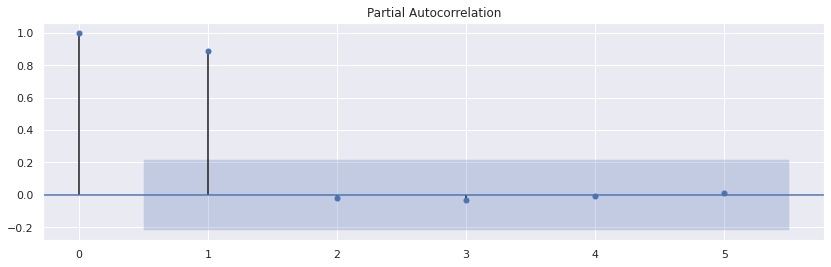

In [0]:
plot_pacf(googleanalyticsdata['Num0fCase'],lags=5)

## ARIMA Modeling

In [0]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [0]:
model = ARIMA(googleanalyticsdata["Num0fCase"],order=(1,2,1))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

                             ARIMA Model Results                              
Dep. Variable:           D2.Num0fCase   No. Observations:                   78
Model:                 ARIMA(1
 2
 1)   Log Likelihood                -524.893
Method:                       css-mle   S.D. of innovations            202.151
Date:                Tue
 28 Apr 2020   AIC                           1057.786
Time:                        06:26:26   BIC                           1067.213
Sample:                             2   HQIC                          1061.560
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.4956     12.715      2.005      0.049       0.576      50.416
ar.L1.D2.Num0fCase     0.0082      0.199      0.041      0.967      -0.382       0.398
ma.L1.D2.Num0fCase  

In [0]:
model_fit.resid.head()

2   -25.495626
3   -34.964497
4   -40.681789
5   -43.691078
6   -45.161155
dtype: float64

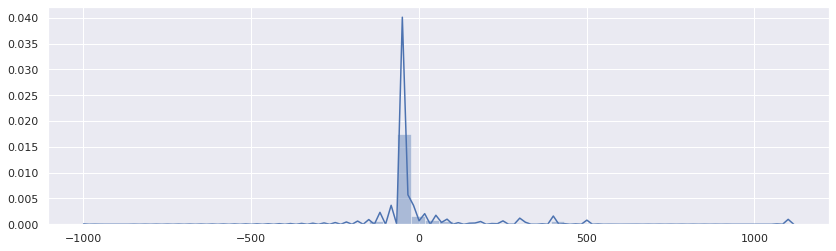

In [0]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals,hist=True,kde=True)

In [0]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))

[1.9810218]


In [0]:
#absolute value because we are not descriminating from being over or under on a prediction

absresiduals =abs(residuals)
print(np.mean(abs(residuals)))

0    96.51567
dtype: float64


In [0]:
#let's get a sense of what the variation in the data is.
#standard deviation is 83
#we can predict within a half of a standard deviation,good.Nor great.
print(googleanalyticsdata['Num0fCase'].describe())

count       80.000000
mean      1632.100000
std       3988.160169
min          0.000000
25%          0.000000
50%          3.500000
75%        344.250000
max      18578.000000
Name: Num0fCase, dtype: float64


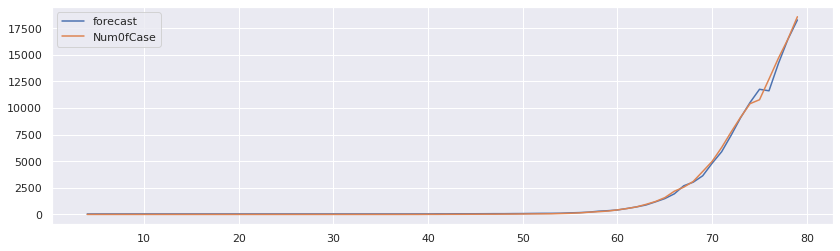

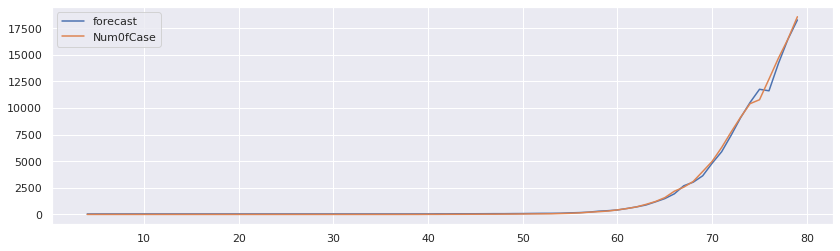

In [0]:
pd.plotting.register_matplotlib_converters()
model_fit.plot_predict()